In [1]:
import gensim
import pandas as pd
import spacy
import nltk
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [2]:
nlp = spacy.load('pt_core_news_sm')

nltk.download('stopwords')
stop_words = stopwords.words('portuguese')  

stop_words.extend(['ir', 'aqui', 'ter', 'todo', 'fazer', 'dizer', 'falar', 'estar', 'hoje', 'algum', 'outro', 'ser',
                   'querer', 'qualquer', 'nado', 'porque', 'vir', 'partir', 'governar', 'deputar', 'parlamentar', 'sr',
                   'presidente', 'vice', 'discursar', 'parecer', 'vez', 'dar', 'ex', 'sim', 'levar', 'quase', 'chance',
                   'ano', 'além', 'sob', 'termo', 'sempre', 'nenhum', 'coisa', 'frase', 'diverso', 'olhar', 'exas',
                   'aliás', 'ficar', 'tanto', 'saber', 'colocar', 'tão', 'dia', 'senhor', 'então', 'tipo', 'lado',
                   'palavra', 'gente', 'apresentar', 'continuar', 'lá', 'nº', 'nome', 'exª', 'ali', 'câmara',
                   'comissão'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tsukasa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def tokenization(texts_list):
    for text in texts_list:
        yield (gensim.utils.simple_preprocess(str(text), deacc=False))


def remove_stopwords(matrix):
    return [[word for word in simple_preprocess(str(line)) if word not in stop_words] for line in matrix]


def lemmatization(matrix):
    matrix_out = []
    for line in matrix:
        doc = nlp(" ".join(line))
        matrix_out.append([word.lemma_ for word in doc])
    return matrix_out


def n_grams(matrix):
    n_grams_model = gensim.models.Phrases(matrix, min_count=2, threshold=10)
    matrix_out = gensim.models.phrases.Phraser(n_grams_model)
    return [matrix_out[line] for line in matrix]


def create_dictionary(matrix):
    return Dictionary(matrix)


def create_corpus(id2word, matrix):
    return [id2word.doc2bow(line) for line in matrix]


def show_keywords(dictionary, corpus):
    return [[(dictionary[word], frequency) for word, frequency in document] for document in corpus]

In [4]:
df = pd.read_json('database/Joice Hasselmann Plenario 2019.json', encoding="utf8")
database = df.discursos.values.tolist()

data_processing = list(tokenization(database))

data_processing = remove_stopwords(data_processing)

data_processing = lemmatization(data_processing)

data_processing = remove_stopwords(data_processing)

data_processing = n_grams(data_processing)

data_processing = n_grams(data_processing)

data_processing = remove_stopwords(data_processing)

dictionary = create_dictionary(data_processing) 

dictionary.filter_extremes(no_below=2)

corpus = create_corpus(dictionary, data_processing)

keywords = show_keywords(dictionary, corpus)

keywords[0][:5] # Show 5 words and frequency of the first document

[('abrir', 1),
 ('absolutamente', 1),
 ('acordar', 6),
 ('ainda', 2),
 ('andar', 1)]

In [5]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=200,
                                            random_state=100, chunksize=5)

In [6]:
import matplotlib.pyplot as plt

words = []
weight = []

for x, topic in lda_model.show_topics(num_words=5, formatted=False):
    for word in topic:
        words.append(word[0])
        weight.append(word[1])

<BarContainer object of 5 artists>

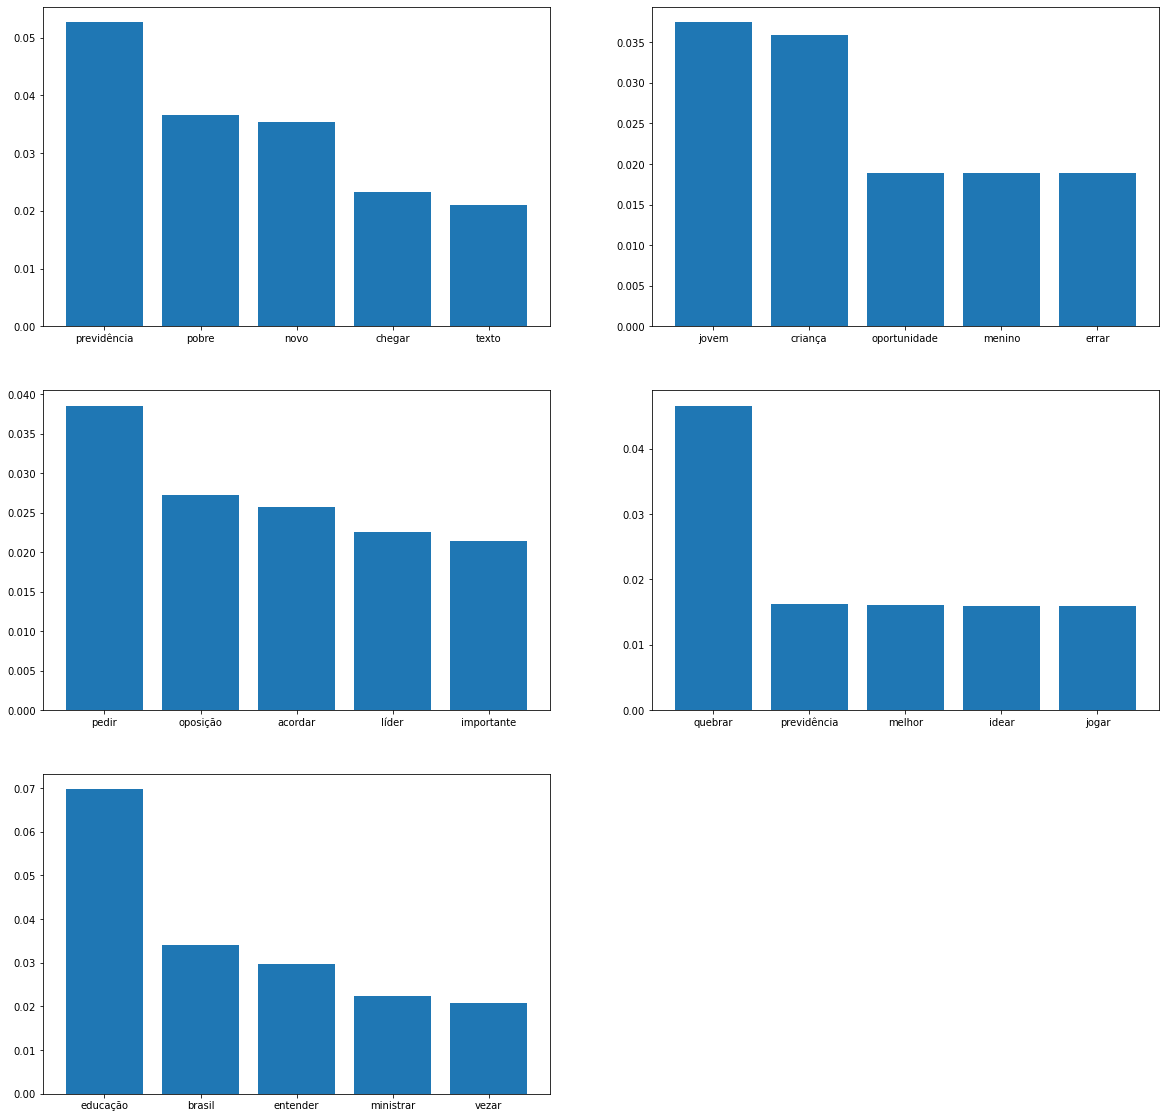

In [7]:
plt.figure(figsize=(20, 20))

plt.subplot(3,2,1)
plt.bar(words[:5], weight[:5])
plt.subplot(3,2,2)
plt.bar(words[5:10], weight[5:10])
plt.subplot(3,2,3)
plt.bar(words[10:15], weight[10:15])
plt.subplot(3,2,4)
plt.bar(words[15:20], weight[15:20])
plt.subplot(3,2,5)
plt.bar(words[20:25], weight[20:25])